<h1>Homicide Reports Data In The US</h1>
<h4>Justin Doan</h4>
<h3>Overview</h3>
<p>We live in a crazy world where crimes happen every single day. Of the many different types of crime that exist, homicides seem to be the type that happens most commonly. As students of the University of Maryland and individuals in society as a whole, we must become educated about the increasing homicide rate in the US so that we are able to make steady steps towards enforcing safety rules. I would like to create tutorial that go in depth on the homicides that have occurred in the US. I plan to restrict the timeline of these crimes from 1980 to 2014, as provided by the dataset I used.</p>

<p>This tutorial will be divided into three distinct sections in order to give a better feel for the different portions of data analysis. In the first part, I will collect the data from the data source and restructure the data so that it is prepared for analysing. Then, in the second part, I will provide a visualization of the data and using that visualization, I will anyalze the data and provide readers with visuals that represents the data in detail. And lastly, I will produce a linear regression model that will verify the implications I've created through the analysis.</p>

<h3>Table of Contents</h3>
<ul>
    <li>
        Data Collection and Wrangling
        <ul>
            <li>Data Tidying</li>
            <li>Seperation of Data</li>
        </ul>
    </li>
    <li>
        Data Analysis
    </li>
    <li>
        Linear Regression Analysis
    </li>
</ul>

<h3>Data Collection and Wrangling</h3>
<p>We plan to utilize the following libraries:</p>
<ul>
<li>folium</li>
<li>pandas</li>
<li>numpy</li>
<li>matplotlib</li>
<li>scikit-learn</li>
</ul>
<p>Prior to data analysis, we will need to have access to some sort of dataset so that we have data to play with. Thanks to Kaggle, I was able to find data pretaining to homicides in the US during this time <a href="https://www.kaggle.com/murderaccountability/homicide-reports/data">here</a>. I downloaded the dataset and simply created a data frame from the data provided. Thanks to Pandas, we are able to extract the data from the CSV file and store it within a data frame data structure. You can learn more about Pandas by checking out it's <a href="https://pandas.pydata.org/pandas-docs/stable/">documentation</a>.

In [6]:
!pip install folium
import pandas as pd
from statsmodels.formula.api import ols
import folium
import statsmodels.api as sm
from sklearn import linear_model
import os
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline

In [7]:
# Here, I would like to retrieve the data from the homicide dataset. After retrieving the data, I would like to then display that data below. As we can see, there have been almost 640,000 crimes during this time.
data_retrieved = pd.read_csv("database.csv", dtype=object)

data_retrieved

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,000001,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,000002,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,000003,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,000004,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,000005,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


<h3>Data Tidying</h3>
<p>From the dataset provided to us, we can see that the set contains important information pretaining to each of the crimes contained within the dataset, including information about the victim, perpetrator, etc.</p> 
<p>In order to help us better understand the data given to us at hand, we have to reformat it in a way that we are scoping down on exactly what we need to look at. We can do this by removing unecessary columns and information, especially those that aren't beneficial for our analysis of the data.</p>

In [8]:
# Here, we would like the drop all of the columns that are unimportant to our analysis of the homicide data.
data_retrieved = data_retrieved.drop('Agency Type', 1)
data_retrieved = data_retrieved.drop('Agency Code', 1)
data_retrieved = data_retrieved.drop('Agency Name', 1)
data_retrieved = data_retrieved.drop('Victim Ethnicity', 1)
data_retrieved = data_retrieved.drop('Record Source', 1)
data_retrieved = data_retrieved.drop('Perpetrator Ethnicity', 1)

# It would also be helpful to sort/group the dataset if we convert the year column to an integer.
data_retrieved['Year'] = data_retrieved['Year'].str.replace(")", "").astype(int)

<h3>Seperation of Data</h3>
<p>In order to fully structure the data so that it's prepared for analysis, we must be able to look at the two different types of individuals from their own scope, meaning that we should split them into their own data frames so that we can take a look at each type accordingly. In order to classify each code, we will use the "Record ID" property in order to distiguish between them.</p>

<p>Below, we are seperating the victims into their own data frame.</p>

In [9]:
# Creates a table for the persons involved in each crime. Here, we are solely scoping in on information about the victim that was involved.
persons_involved_information = pd.DataFrame(data_retrieved[['Record ID','City','State','Year','Crime Type','Victim Sex','Victim Age', \
                                 'Victim Count']])

persons_involved_information

,Record ID,City,State,Year,Crime Type,Victim Sex,Victim Age,Victim Count
0,000001,Anchorage,Alaska,1980,Murder or Manslaughter,Male,14,0
1,000002,Anchorage,Alaska,1980,Murder or Manslaughter,Male,43,0
2,000003,Anchorage,Alaska,1980,Murder or Manslaughter,Female,30,0
3,000004,Anchorage,Alaska,1980,Murder or Manslaughter,Male,43,0
4,000005,Anchorage,Alaska,1980,Murder or Manslaughter,Female,30,0
...,...,...,...,...,...,...,...,...
638449,638450,Park,Wyoming,2014,Murder or Manslaughter,Male,30,0
638450,638451,Sheridan,Wyoming,2014,Murder or Manslaughter,Male,62,0
638451,638452,Sheridan,Wyoming,2014,Murder or Manslaughter,Female,0,0
638452,638453,Sublette,Wyoming,2014,Murder or Manslaughter,Male,55,0


<p>Below, we are seperating the criminals into their own data frame. Here we must remove any crimes that are not particularly useful in our analysis. That includes unsolved cases and crimes where the criminal is undefined (where his/her age is 0).</p>

In [10]:
# Creates a table for the persons involved in each crime. Here, we are solely scoping in on information about the perpetrator that was involved.
criminals_involved_data = pd.DataFrame(data_retrieved[['Record ID','City','State','Year','Crime Type','Crime Solved','Perpetrator Sex', \
                              'Perpetrator Age','Weapon','Perpetrator Count']])

# Since we would like to remove any cases that don't contain enough information, it's important to discard those prior to analysis.
# We should remove any unsolved cases. In addition, a few cases contained a perpetrator with the age of 0, so we should definitely remove those as well. In those cases, the identity of the perpetrator was unknown.
criminals_involved_data = criminals_involved_data[criminals_involved_data['Crime Solved'] != 'No']
criminals_involved_data = criminals_involved_data[criminals_involved_data['Perpetrator Age'] != '0']

# It would also be helpful to sort/group the dataset if we convert the year column to an integer.
criminals_involved_data['Perpetrator Age'] = criminals_involved_data['Perpetrator Age'].str.replace(")", "").astype(int)

criminals_involved_data

,Record ID,City,State,Year,Crime Type,Crime Solved,Perpetrator Sex,Perpetrator Age,Weapon,Perpetrator Count
0,000001,Anchorage,Alaska,1980,Murder or Manslaughter,Yes,Male,15,Blunt Object,0
1,000002,Anchorage,Alaska,1980,Murder or Manslaughter,Yes,Male,42,Strangulation,0
3,000004,Anchorage,Alaska,1980,Murder or Manslaughter,Yes,Male,42,Strangulation,0
5,000006,Anchorage,Alaska,1980,Murder or Manslaughter,Yes,Male,36,Rifle,0
6,000007,Anchorage,Alaska,1980,Murder or Manslaughter,Yes,Male,27,Knife,0
...,...,...,...,...,...,...,...,...,...,...
638448,638449,Natrona,Wyoming,2014,Murder or Manslaughter,Yes,Male,67,Firearm,0
638450,638451,Sheridan,Wyoming,2014,Murder or Manslaughter,Yes,Male,57,Handgun,0
638451,638452,Sheridan,Wyoming,2014,Murder or Manslaughter,Yes,Female,22,Suffocation,0
638452,638453,Sublette,Wyoming,2014,Murder or Manslaughter,Yes,Male,31,Knife,1


<h3>Data Analysis and Visualization</h3>
<p>After collecting and tidying up our data, it's now time to actually analyze the data at hand. As with any data, it's always useful to display that data in a way that almost anyone can understand. It's important to make sure that, even to someone who has no idea what we're working on, can make use of our visualization. In this case, we would like to display the data with the purpose of displaying the presence of homicide cases in our society. We should be able to do this not only through a visual but also through statistical analysis as well. 

<h3>Homicide By Year</h3>
<p>First, it would be helpful to see the number of homicides that occur yearly during the given time period. We can extract this data by finding the count of homicides during each year. We can seperate these out by using the groupby (provided by Pandas) function to first sort the homicides by year and then using the count function to find the number of homicides that occur during a specific year.</p> 

In [11]:
# Here, it's useful to use the groupby function in order to group each of the homicides in the dataset by year. After that, we can use the count function in order to retrieve the number of homicides that occured in any given year.
crimes_grouped_by_year = data_retrieved.copy().groupby(data_retrieved['Year'], as_index=True, group_keys=True).count()

numbers_by_year = crimes_grouped_by_year[['Record ID']].reset_index()
numbers_by_year = numbers_by_year.rename(index=str, columns={'Record ID' : 'Count'})

numbers_by_year

,Year,Count
0,1980,23092
1,1981,21208
2,1982,20544
3,1983,19653
4,1984,18093
5,1985,18386
6,1986,20125
7,1987,18783
8,1988,18779
9,1989,19868


<h4>Visualize Homicides Number With Year</h4>
<p>Since we were able to filter the data and find out how many homicides occur each year, we must graph that data, using the "Year" and "Count" columns provided by the table above. We can use a library called matplotlib to do this. The library provides a wide range of resources in order to generate aestetically pleasing graphs. You can learn more about it <a href="https://matplotlib.org/">here</a>.</p>

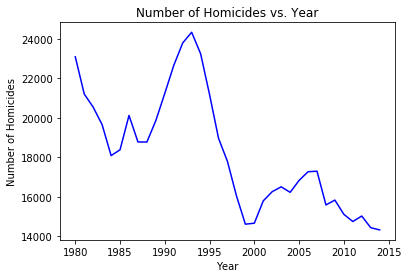

In [13]:
# In order to plot the data, we should provide the x-axis with the year, while giving the y-axis as the number of homicides. Using this plot, we can see the trend of homicide cases throughout the years.
plot.plot(numbers_by_year['Year'], numbers_by_year['Count'], color='blue')

plot.ylabel('Number of Homicides')
plot.xlabel('Year')
plot.title('Number of Homicides vs. Year')

# Display the resulting plot
plot.show()

<p>From the plot, we can see that the trend has been steadily increasing by year. We can see that the maximum was reached during the 1994, but decreases by year. At the year of the 2014, the number of homicides seems to be at it's smallests ever compared to the number of previous years.</p>
<h4>Statistic Data</h4>
<p>To better understand the data, it would be helpful for us to provide general statistical information of the data we're dealing with.</p>

In [14]:
print("From the data, we can see that the average rate of homicides is " + str(numbers_by_year['Count'].mean()) + " homicides/year.")
print("Standard deviation: " + str(numbers_by_year['Count'].std()))

From the data, we can see that the average rate of homicides is 18241.542857142857 homicides/year.
Standard deviation: 2986.4466525292833


<p>We can see that the average for the number of homicides is pretty high, standing at 18241 cases per year. The standard deviation is also pretty large, denoting that there is a large difference depending on the year.</p>

<h3>Homicide By State</h3>
<p>Now, it's time to show you all how to display this information using different Python libraries.</p> 
<h4>Extract the Homicide Number Per State</h4>
<p>Here, we fill use the same methods as we used for age, but for state.</p>

In [15]:
data_by_state = data_retrieved.copy().groupby(data_retrieved['State'], as_index=True, group_keys=True).count()
count_based_on_state = data_by_state[['Record ID']].reset_index()
count_based_on_state = count_based_on_state.rename(index=str, columns={'Record ID' : 'Count'})
count_based_on_state.head()

,State,Count
0,Alabama,11376
1,Alaska,1617
2,Arizona,12871
3,Arkansas,6947
4,California,99783


<h4>Visualize Homicide Number With States With Graph</h4>
<p>Here, we'll do something similar to what we've done above but will use a horizontal bar plot in order to present the data (homicide number by state).</p>

Text(0.5, 1.0, 'State vs. Number of Homicides')

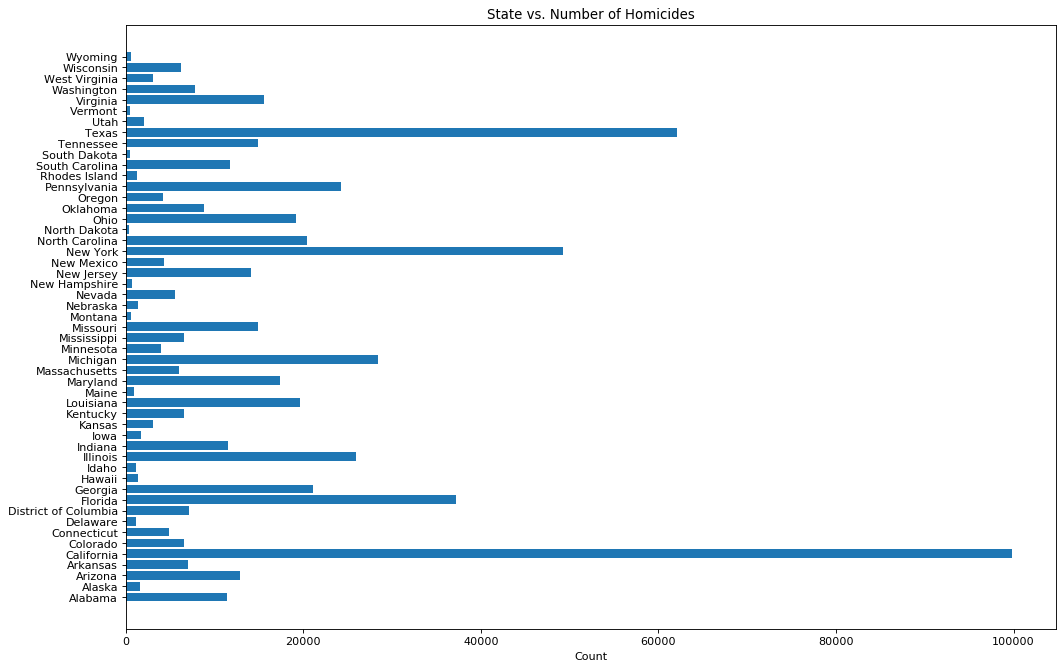

In [16]:
# Here, we are provide parameters to intialize the size of the plot
plot.figure(figsize=(15, 10), dpi=80)
position_value_y = np.arange(len(count_based_on_state['State']))

# Here, we are plotting the data on the graph using a horizontal bar plot
plot.barh(position_value_y, count_based_on_state['Count'])

plot.yticks(position_value_y, count_based_on_state['State'])
plot.xlabel('Count')
plot.title('State vs. Number of Homicides')

<p>From looking the graph, we can see the number of homicide cases for each seems to be proportional with the size of the state! For example, if we take a look at the graph, California seems to have the largest number of homicide cases compared to any other state in the US. The number of homicides tends to be smaller within the smaller states.</p>

<h4>Visualize Homicides Number With States With Map</h4>
<p>Thanks to a library called folumn, we can do even more with our data! We can use the library in order to present the homicide percentages within each state. In order to do so, we will need to use a GeoJSON file that allows us to plot the boundaries of the United States. Using this file, will allow us to easily color in the states based on the number of homicidies within a specific state.</p>
<p>You can learn more about the folium librariy <a href="https://folium.readthedocs.io/en/latest/">here</a>. In addition, the us-states json file can be accessed here.</p>
<p>Here comes the cool part of this section. We would like to illustrate the number of homicides percentage by state on map. Python has a library called folium. In general, folium is a library that allows users to play with maps. More information about folium can be found <a href="https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json">here</a>.</p>

In [18]:
# Retrieves the percentages of homicides based on state
count_based_on_state['Percentage'] = count_based_on_state['Count']*100/count_based_on_state['Count'].sum()

# Retrieves the us-states JSON file
geo_data_state = os.path.join('us-states.json')

# Initializes the map instance using a fixed starting point
m = folium.Map(location=[48, -102], zoom_start=3)

# Here, we would like to create a chorpleth layer that will allow us to color in a specific state based on a percentage
folium.Choropleth(
    geo_data=geo_data_state,
    name='choropleth',
    data=count_based_on_state,
    columns=['State','Percentage'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of Homicides'
).add_to(m)

folium.LayerControl().add_to(m)
m

<h3>Number of Perpetrators By Age</h3>
<p> In order to complete our analysis, we should examine the ages of the perpetrators involved in each case. We would like to do so in order to get a feel for the general average age of the the criminals involved. For someone who's just coming across this tutorial, this information helps because it gives us more insight on the general age range where homicides are most common.

<h4>Extract the Homicides Number by Age</h4>
<p>Here, we fill use the same methods as we used for the victims, but for the perpetrator.</p>

In [19]:
perpetrator_age_data = criminals_involved_data.copy().groupby(criminals_involved_data['Perpetrator Age'], as_index=True, group_keys=True).count()
perpetrator_age_count = perpetrator_age_data[['Record ID']].reset_index()
perpetrator_age_count = perpetrator_age_count.rename(index=str, columns={'Record ID' : 'Count'})
perpetrator_age_count

,Perpetrator Age,Count
0,1,16
1,2,6
2,3,24
3,4,29
4,5,31
...,...,...
94,95,9
95,96,7
96,97,3
97,98,6


<h4>Visualize Homicide Number by Age</h4>
<p>Here, we will use a vertical bar plot.</p>

Text(0.5, 1.0, 'Age vs. Number of Homicides')

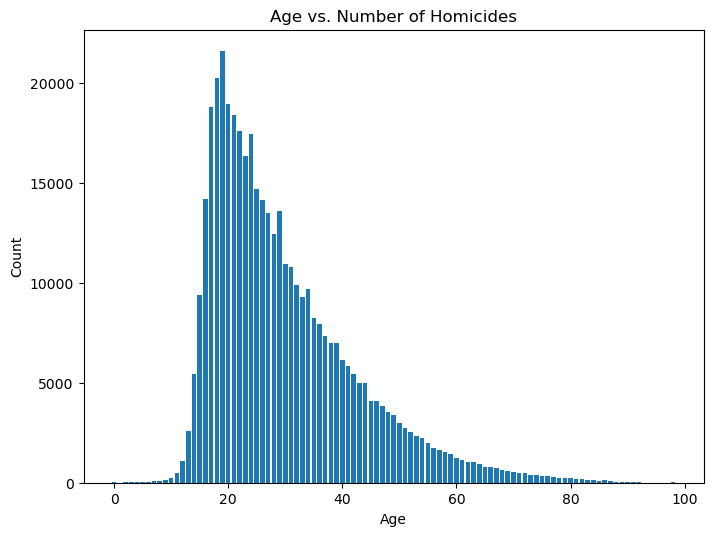

In [20]:
plot.figure(figsize=(8, 6), dpi=100)
position_value_y = np.arange(len(perpetrator_age_count['Perpetrator Age']))
plot.bar(position_value_y, perpetrator_age_count['Count'])
plot.ylabel('Count')
plot.xlabel('Age')
plot.title('Age vs. Number of Homicides')

In [21]:
print("The average age value of a perpetrator involved in a homicide case is: " + str(sum(perpetrator_age_count['Count']*perpetrator_age_count['Perpetrator Age'])/ \
                                                    perpetrator_age_count['Count'].sum()) + " years old")

The average age value of a perpetrator involved in a homicide case is: 30.729443474299597 years old


<p>From this, we can see that perpetrators in homicide cases tend to be around the age of 18 to 30. The number seems to decreases for individuals older than 30. A noticable fact presented by the graph is that the highest number of homicide cases involves a perpetrator of the age of 19. I was particularly surprised by this, as I did not think the number would be so low.</p>

<h3>Linear Regression and Hypothesis Test</h3>
<p>Now that we have successfully analyze the data, we can begin using linear regression in order to test our hypothesis. In linear regression, we utilize the data we already have to we can basically make predictions about what our data would look like beyond the scope of what is already given to us. I will take a linear regression comparing homcide numbers to the year and compare that regression to a regression that takes into account the states (here, I will use an F-test). Our hypothesis here is that the more factors that are involved during the linear regression process, the more accurate our predictions will become.</p>
<h3>Linear Regression on Homicide by Years</h3>
<p>First, we should produce the lin. reg. model (using the Linear Regression model library) that compares the number of homicides to a certain year. You can learn more about the library <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">here.</a></p>

Text(0.5, 1.0, 'Homicide Count vs. Year with Linear Regression')

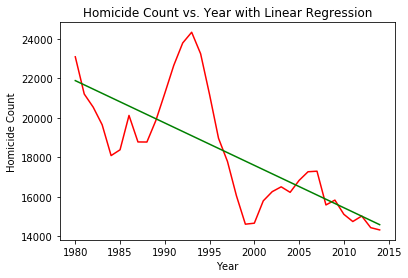

In [23]:
#Linear Regression
regression = linear_model.LinearRegression()
X = [[x] for x in numbers_by_year['Year'].values]
Y = [[y] for y in numbers_by_year['Count'].values]
regression_fit = regression.fit(X, Y)

#Get predicted Values
predicted_homicides_list = []
for x in numbers_by_year['Year'].values:
    predicted_homicides_list.append(regression_fit.predict([[x]])[0][0])
numbers_by_year['predicted_homicides_list'] = pd.Series(predicted_homicides_list, index = numbers_by_year.index)

#Plot the linear regression line with the data
plot.plot(numbers_by_year['Year'], numbers_by_year['Count'], color='red',)
plot.plot(numbers_by_year['Year'], numbers_by_year['predicted_homicides_list'], color='green')
plot.xlabel("Year")
plot.ylabel("Homicide Count")
plot.title("Homicide Count vs. Year with Linear Regression")

<h3>Fitting the Linear Regression Model</h3>
<p>We will first need to sort the data by year and state in order to retrieve the number of homocides associated for each year/state pair. Then, we will fit that data into the linear regression model, which will provide us with predictions on what additional data would look like. To do, we can use the <a href="http://www.statsmodels.org/stable/index.html">ols library</a> pertaining to regression.</p>
<p>For this experiment, it's useful to fit two distinct linear regression models, one that deals with the year, while the deals with both the year and the state.</p>

In [24]:
# I would like to fit the first regression model, using year as the primary factor
first_regression_var = ols(formula='Count ~ Year', data=numbers_by_year).fit()
first_regression_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     38.93
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           4.78e-07
Time:                        18:54:00   Log-Likelihood:                -315.58
No. Observations:                  35   AIC:                             635.2
Df Residuals:                      33   BIC:                             638.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.464e+05   6.86e+04      6.505      0.000    3.07e+05    5.86e+05
Year        -214.4092     34.364     -6.239      0.000    -284.324    -144.494
==============================================================================
Omnibus:                        6.603   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                5.211
Skew:                           0.897   Prob(JB):                       0.0739
Kurtosis:                       3.594   Cond. No.                     3.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p>The second linear regression seems to account for not only the year, but also for the states that the homicides occurred in. From this, we can hypothesize that additional factors will provide more accuracy for the linear regression model. Here, we are using the second regression.</p>

In [25]:
# Here, I would like to create a copy of the existing data and am filtering out the year and state of each homicide case
grouped_using_state_and_year = data_retrieved.copy()
grouped_using_state_and_year  = grouped_using_state_and_year[['Year','State']]

# By filtering out the year and state, I am able to see exactly how many homicide cases exists in each state by year
grouped_using_state_and_year = grouped_using_state_and_year.groupby(['Year','State']).size()
grouped_using_state_and_year = grouped_using_state_and_year.reset_index()

# Here, I would like to reinitialize the "Count" column
grouped_using_state_and_year['Count'] = grouped_using_state_and_year[0]
grouped_using_state_and_year = grouped_using_state_and_year.drop(0,1)

# Here, we are creating a second regression using the state and year as factors
second_regression_var = ols(formula='Count ~ Year + State + Year * State', data=grouped_using_state_and_year).fit()
second_regression_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     324.4
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:54:02   Log-Likelihood:                -10866.
No. Observations:                1759   AIC:                         2.194e+04
Df Residuals:                    1657   BIC:                         2.249e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            1.96e+04   4132.579      4.743      0.000    1.15e+04    2.77e+04
State[T.Alaska]                    -1.847e+04   5761.760     -3.205      0.001   -2.98e+04   -7165.948
State[T.Arizona]                   -3.001e+04   5761.760     -5.209      0.000   -4.13e+04   -1.87e+04
State[T.Arkansas]                  -1.551e+04   5761.760     -2.693      0.007   -2.68e+04   -4213.387
State[T.California]                   7.7e+04   5761.760     13.364      0.000    6.57e+04    8.83e+04
State[T.Colorado]                  -1.632e+04   5761.760     -2.832      0.005   -2.76e+04   -5014.470
State[T.Connecticut]               -1.572e+04   5761.760     -2.729      0.006    -2.7e+04   -4420.224
State[T.Delaware]                  -2.055e+04   5761.760     -3.566      0.000   -3.18e+04   -9244.266
State[T.District of Columbia]      -1.043e+04   5931.192     -1.759      0.079   -2.21e+04    1200.089
State[T.Florida]                   -2023.5778   5850.508     -0.346      0.729   -1.35e+04    9451.589
State[T.Georgia]                   -1.885e+04   5761.760     -3.272      0.001   -3.02e+04   -7551.636
State[T.Hawaii]                     -1.74e+04   5761.760     -3.020      0.003   -2.87e+04   -6096.546
State[T.Idaho]                     -1.935e+04   5761.760     -3.358      0.001   -3.06e+04   -8046.336
State[T.Illinois]                   1.613e+04   5761.760      2.799      0.005    4825.723    2.74e+04
State[T.Indiana]                   -2.028e+04   5761.760     -3.519      0.000   -3.16e+04   -8973.932
State[T.Iowa]                      -1.897e+04   5776.664     -3.285      0.001   -3.03e+04   -7644.197
State[T.Kansas]                    -1.785e+04   5769.515     -3.094      0.002   -2.92e+04   -6533.300
State[T.Kentucky]                  -1.247e+04   5795.495     -2.152      0.032   -2.38e+04   -1102.507
State[T.Louisiana]                 -1.394e+04   5761.760     -2.420      0.016   -2.52e+04   -2643.335
State[T.Maine]                     -1.937e+04   5787.984     -3.347      0.001   -3.07e+04   -8019.723
State[T.Maryland]                   -1.99e+04   5761.760     -3.454      0.001   -3.12e+04   -8598.168
State[T.Massachusetts]             -1.686e+04   5761.760     -2.926      0.003   -2.82e+04   -5560.680
State[T.Michigan]                   9077.2554   5761.760      1.575      0.115   -2223.841    2.04e+04
State[T.Minnesota]                 -2.041e+04   5761.760     -3.543      0.000   -3.17e+04   -9112.917
State[T.Mississippi]               -1.728e+04   5761.760     -2.999      0.003   -2.86e+04   -5980.191
State[T.Missouri]                  -1.584e+04   5761.760     -2.749      0.006   -2.71e+04   -4536.298
State[T.Montana]                   -1.985e+04   5817.927     -3.411      0.001   -3.13e+04   -84

<h3>Hypothesis Testing</h3>
<p>As with any hypothesis, it's always important to verify it so that we are sure that it's correct. We can do this by utilizing an F-test! An F-test can be used to help prove that our data fits the current linear regression models that we've set up. You can learn a little bit more about F-tests <a href="https://explorable.com/f-test">here</a>. F-tests can be carried using a specific method by the name of ANOVA. There are numerous examples using the technique <a href="http://www.statsmodels.org/stable/anova.html">here</a>.

In [26]:
# Here, we would like to run ANOVA one time in order to carry out the f-test
first_res = sm.stats.anova_lm(first_regression_var, typ=2)
first_res

,sum_sq,df,F,PR(>F)
Year,1.641176e+08,1.0,38.928523,4.779064e-07
Residual,1.391237e+08,33.0,NaN,NaN


In [27]:
# Here, we would like to run ANOVA a second time in order to carry out the f-test
second_res = sm.stats.anova_lm(second_regression_var, typ=2)
second_res

,sum_sq,df,F,PR(>F)
State,4.478197e+08,50.0,620.692039,0.000000e+00
Year,3.396029e+06,1.0,235.350116,9.036406e-50
Year:State,2.170838e+07,50.0,30.088485,1.704537e-194
Residual,2.391000e+07,1657.0,NaN,NaN


<h3>Results</h3>
<p>From the F-tests conducted above on the linear regression model pairs, if we look specifically at the PR(>F) column, we can see that the model that takes both state and year into account produces a pretty small value compared to the other linear regression model that only takes in year as a contributing factor. From this, we can imply that the model that takes in both year and state will ultimately year more accurate predictions.</p>

<h3>What's next? (Conclusion)</h3>
<p>Homicides happen every single day in the world we live in. It's sad, but it's the hard truth that we all must face. As such, it's crucial that we are alive of the dangers that surround us and understand the trend of the numerous homicide cases that exist all throughout the world. This tutorial was created so that people can understand and become more aware of the different situations occurring in the world today. Without analyzing the data, it's really hard to see the results and the increasing trend. Through this tutorial, I hope that other people out there will understand and realize how important it is to create more safety rules and regulations so that our society can become a better place. From the dataset, I am able to conclude that the number of homicides signficantly differs in each state and year. While there are more homicides in states like California, homicides happen particularly less in other states. On the bright side, however, we can see that the number of homicides occuring each year has been gradually decreasing, meaning that we are definitely making a lot of progress towards making the world a better place. I hope that readers will take the time to get educated about the information contained not only in this tutorial, but also reach other to other resources to learn more.</p>

<h3>Sources utilized:</h3>
<ul>
<li>Homicide Dataset: https://www.kaggle.com/murderaccountability/homicide-reports/data</li>
<li>Pandas Complete Documentation: https://pandas.pydata.org/pandas-docs/stable/</li>
<li>Linear Regression Model: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</li>
<li>Matplotlib: https://matplotlib.org/</li>
<li>Folium: https://folium.readthedocs.io/en/latest/</li>
<li>Linear Regression Model Using OLS: http://www.statsmodels.org/stable/index.html</li>
<li>F-Test: https://explorable.com/f-test</li>
<li>ANOVA Technique: http://www.statsmodels.org/stable/anova.html</li>
</ul>

In [28]:
os.system('jupyter nbconvert --to html index.ipynb')

0